# Dimentionality Reduction
- used to reduce number of feature
- two types: Feature Selection & Feature Extraction  

Advantages:  
- less space is required
- less computation time
- takes care of multicollinearity by removing redundant features(e.g: kg & gms)



## Common Feature Selection Techiniques
By only keeping the most relevant variables from the original dataset

- Backward Feature Elimination (Start removing one variable each time and check performance)
- Forward Feature Selection (Start with one variable and see which is best)
- Random Forest (comes packaged with in-built feature importance)



## Common Feature Extraction Techiniques

### 1. Principal Component Analysis (PCA)
- linear dimensionality reduction or feature selection technique
- unsupervised algorithm as it ignores class labels and goal is to find the direction
- performs a linear mapping of the data to the lower-dimensional space such that the variance of the data is maximised in the lower dimensional space
- remove feature that explains less % of variance


<a href="https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues">More read</a>




In [2]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

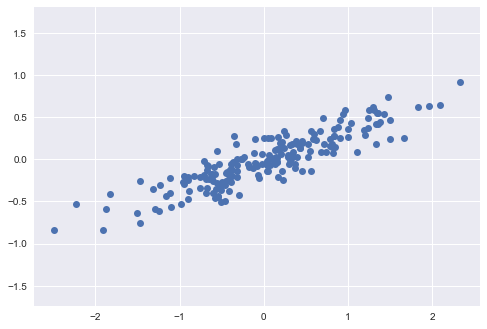

In [4]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


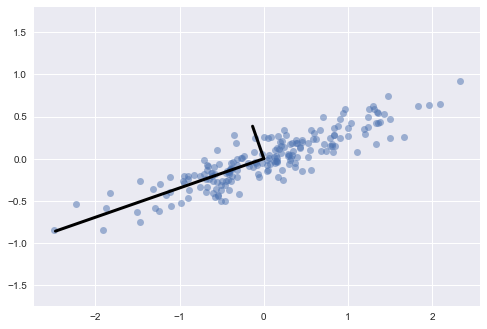

In [7]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');



In [67]:
#Take the full code from Logistic Regression and modify the import dataset X & y to include more features
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
dataset = pd.read_csv('Data/Dimensionality/Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

X = X.astype(float)
y = y.astype(float)

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components = None), In case to check the variance of each independent variable
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)



[0.37281068 0.18739996]


In [63]:
#Apply Logic Regresson after reducing the features
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)
print(lr_model.score(X_train,y_train))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_predict_test)
print(cm)



0.9624060150375939
[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]


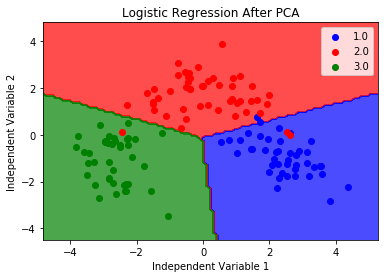

In [60]:
from matplotlib.colors import ListedColormap
#Define Variables
clf = lr_model
h = 0.1
X_plot, z_plot = X_train, y_train 

#Template for all Regression
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('blue', 'red', 'green')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['blue', 'red', 'green'][i], cmap = ListedColormap(('blue', 'red', 'green')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic Regression After PCA')
plt.xlabel('Independent Variable 1')
plt.ylabel('Independent Variable 2')
plt.legend()

plt.show()

#### How to Choose the Number of Components

But how much information have we thrown away? We can check this  by looking at the explained variance as a function of the components:
- We just need 4 Features to explain 80% of Variance in the data

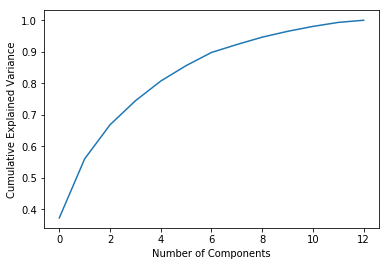

In [3]:
#np.cumsum -> cumulative sum of array elements
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

## Issue with PCA
1. Measurements from all of the original variables are used in the projection to the lower dimensional space
2. Only linear relationships are considered
3. Do not consider the potential multivariate nature of the data structure (higher order interaction between variables)

### How to Address above issues?
1. Feature Selection Techiniques can be used
2. Kernel PCA - to embed nonlinear relationships into a lower dimensional space
3. Random Forest or Decision Tree. Random Forest derive Gini- or permutation-based measures of feature importance.

### Advantages of PCA
- Improves performance of Algorithm(less feature)
- Help in removing correlated feature
- Reduces overfitting
- Reduce Training time


### 2. Linear Discriminant Analysis <a href="https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567">(LDA)</a>


In [64]:
#Take the full code from Logistic Regression and modify the import dataset X & y to include more features
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data\Dimensionality\Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

X = X.astype(float)
y = y.astype(float)

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = None)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_
print(explained_variance)


[0.74784132 0.25215868]


## 3. Kernel PCA

In [65]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
import numpy
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)


